# Web Scraping for Indeed.com Australia and Salary Prediction

## PART 4 : Job Category Classification and Clustering

This project is a test of three major skills: collecting data by scraping a website, using natural language processing, and building a binary classifier.

Author : Ayesha Khatib

# Problem Statement : 

The following code and machine learning techniques are used to :
- Find the solution for factors that distinguish jobs of a 'Data Scientist' and 'Data Analyst' jobs.
- For this solution will work more on the keywords in Job title and the Summary and predict if the role is for any of the three.
- I will analyze what classification models can be applied as we can clearly see three different job categories. Again, some more feature engineering and extraction, to understand which feature has the most impact to distinguish three categories.
- I have applied different models and especially clustering techniques to create clusters that include the important factors.

### Importing packages

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.pipeline import make_pipeline, Pipeline

### Read the saved file from part 3 solution.

In [241]:
jobs = pd.read_csv('jobs_part3_complete.csv', index_col=0)

In [242]:
jobs.head()

,Job_Title,City,Low_Salary,Hi_Salary,Salary_period,Salary_mean,Job_Title_analyst,Job_Title_data,Job_Title_scientist,Job_Title_business,...,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka,Salary_class
Company,,,,,,,,,,,,,,,,,,,,,
None,Junior Data Scientist,Sydney,NaN,NaN,NaN,105769.230769,0.0,0.363327,0.478627,0.0,...,0,0,0,1,1,0,0,0,0,2
DataRobot,Customer Facing Data Scientist,Sydney,NaN,NaN,NaN,105769.230769,0.0,0.243798,0.321165,0.0,...,0,1,0,1,1,0,0,0,0,2
Freshwater Group,Data Scientist,Sydney,NaN,NaN,NaN,105769.230769,0.0,0.604631,0.796506,0.0,...,0,0,0,1,1,0,0,0,0,2
CPT Global,Data Scientist,Sydney,NaN,NaN,NaN,105769.230769,0.0,0.604631,0.796506,0.0,...,0,0,0,1,1,1,0,1,0,2
Qantas Airways Limited,Senior Data Scientist,Sydney,NaN,NaN,NaN,105769.230769,0.0,0.464188,0.611494,0.0,...,0,0,0,1,1,0,0,0,0,2


In [243]:
# As this part is more focussed on the factors and not Salary prediction values, better to drop them.

dropcols = ['Low_Salary','Hi_Salary','Salary_class','Salary_period']
jobs.drop(dropcols, axis=1, inplace=True)

In [244]:
jobs.describe()

,Salary_mean,Job_Title_analyst,Job_Title_data,Job_Title_scientist,Job_Title_business,Job_Title_senior,Job_Title_engineer,Job_Title_manager,Job_Title_reporting,Job_Title_commercial,...,skill_python,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,516.0,516.000000,516.000000,516.000000,516.000000,516.000000
mean,106744.770498,0.141564,0.120068,0.079421,0.065005,0.054612,0.025813,0.024785,0.017812,0.016576,...,0.284884,0.087209,0.071705,0.158915,1.0,0.527132,0.164729,0.015504,0.032946,0.017442
std,20666.360527,0.168572,0.212253,0.210780,0.185122,0.156650,0.110043,0.101622,0.104116,0.108458,...,0.451797,0.282415,0.258250,0.365951,0.0,0.499748,0.371295,0.123665,0.178668,0.131038
min,33410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105769.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105769.230769,0.129272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,105769.230769,0.230883,0.216634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,280800.000000,1.000000,0.807632,1.000000,0.882079,0.883968,0.865773,0.634374,0.939499,0.944079,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Defining the Job Categories for the three jobs :

In [245]:
#Define a function to assign a label based on whether the job title contains the word scientist(2), analyst(1) or neither(0)

def category_finder(string):
    if 'scientist' in string.lower():
        val = 2
    elif 'analyst' in string.lower():
        val = 1
    else:
        val = np.nan
    return val

In [246]:
#Create a column for category labels
jobs['Job_category'] = jobs['Job_Title'].apply(category_finder)

In [247]:
#Drop the jobs that fit into none of the above categories which are other titles.
jobs_sub = jobs.dropna()

### Define target and predictor variables:

In [248]:
#Target variable is the job category

y = jobs_sub['Job_category']
y.shape

(355,)

In [249]:
jobs_sub.head(2)

,Job_Title,City,Salary_mean,Job_Title_analyst,Job_Title_data,Job_Title_scientist,Job_Title_business,Job_Title_senior,Job_Title_engineer,Job_Title_manager,...,skill_spark,skill_hadoop,skill_tableau,skill_r,skill_excel,skill_sas,skill_spss,skill_aws,skill_kafka,Job_category
Company,,,,,,,,,,,,,,,,,,,,,
None,Junior Data Scientist,Sydney,105769.230769,0.0,0.363327,0.478627,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,2.0
DataRobot,Customer Facing Data Scientist,Sydney,105769.230769,0.0,0.243798,0.321165,0.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,0,2.0


In [250]:
#Predictors are the mean_salary, plus the title, state and keyword columns

X = jobs_sub.iloc[:,2:-1]
X.shape

(355, 1037)

In [251]:
list(X.columns)

['Salary_mean',
 'Job_Title_analyst',
 'Job_Title_data',
 'Job_Title_scientist',
 'Job_Title_business',
 'Job_Title_senior',
 'Job_Title_engineer',
 'Job_Title_manager',
 'Job_Title_reporting',
 'Job_Title_commercial',
 'Job_Title_research',
 'Job_Title_technical',
 'Job_Title_consultant',
 'Job_Title_digital',
 'Job_Title_lead',
 'Job_Title_st',
 'Job_Title_finance',
 'Job_Title_junior',
 'Job_Title_financial',
 'Job_Title_pricing',
 'Job_Title_analytics',
 'State_ACT',
 'State_NSW',
 'State_QLD',
 'State_VIC',
 'State_WA',
 'kw_data',
 'kw_experi',
 'kw_team',
 'kw_analyt',
 'kw_manag',
 'kw_develop',
 'kw_project',
 'kw_custom',
 'kw_analyst',
 'kw_process',
 'kw_skill',
 'kw_analysi',
 'kw_client',
 'kw_report',
 'kw_use',
 'kw_opportun',
 'kw_support',
 'kw_high',
 'kw_model',
 'kw_provid',
 'kw_appli',
 'kw_product',
 'kw_technic',
 'kw_financi',
 'kw_solut',
 'kw_stakehold',
 'kw_insight',
 'kw_market',
 'kw_learn',
 'kw_scienc',
 'kw_servic',
 'kw_abil',
 'kw_communic',
 'kw_in

In [252]:
#In order to extract meaningful features about the job, I'll remove the obvious things, like having 'analyst' or 'scientist' in
#the job title or description
dropcols = ['Job_Title_analyst', 'Job_Title_scientist','kw_scientist','kw_analyst','kw_scientists','kw_scienc','kw_science','kw_analys','kw_analyt']
X.drop(dropcols, axis=1, inplace=True)

In [253]:
X.shape

(355, 1028)

In [254]:
#Set up train-test split, stratify on category labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11, stratify=jobs_sub['Job_category'])

In [255]:
y_test.value_counts()

1.0    93
2.0    25
Name: Job_category, dtype: int64

In [256]:
baseline = 93 / len(y_test)
baseline

0.788135593220339

### Define different classification techniques:

### 1. KNN ::

In [257]:
knn_params = {'n_neighbors':[1,3,5,9,15,18,21,25],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5)
knn_gs.fit(X_train, y_train)
knn = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [258]:
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)

### Confusion matrix plot using KNN

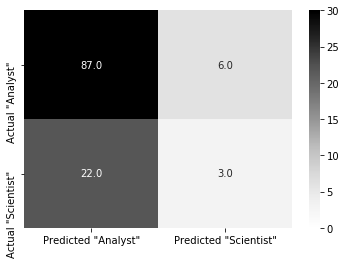

In [259]:
cm_knn = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm_knn, annot=True, fmt = '.1f', cmap = 'Greys', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted "Analyst"','Predicted "Scientist"'], 
            yticklabels = ['Actual "Analyst"', 'Actual "Scientist"'])

### 2. Decision Tree :: 

In [260]:
params = {'max_depth':[3,4,5],
         'max_leaf_nodes':[2,3,4],
         'min_samples_split':[2,3,4,5,10,15,25],
         'max_features':[5,10,50,100,500]}
dtc_gs = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_gs.fit(X_train, y_train)
dtc = dtc_gs.best_estimator_
print(dtc_gs.best_params_)

{'max_depth': 4, 'max_features': 100, 'max_leaf_nodes': 2, 'min_samples_split': 15}


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [261]:
dtc_pred = dtc.predict(X_test)
dtc_score = dtc.score(X_test, y_test)

### Confusion matrix plot using Decision Tree

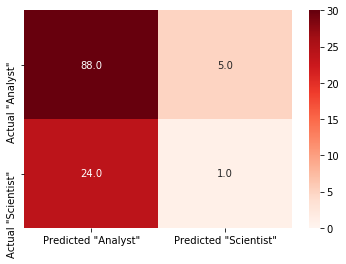

In [262]:
cm_dtc = confusion_matrix(y_test,dtc_pred)
sns.heatmap(cm_dtc, annot=True, fmt = '.1f', cmap = 'Reds', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted "Analyst"','Predicted "Scientist"'], 
            yticklabels = ['Actual "Analyst"', 'Actual "Scientist"'])

### 3. Bagging

In [263]:
bag = BaggingClassifier(dtc, max_samples=1.0,random_state=5)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_score = bag.score(X_test, y_test)

### Confusion matrix plot using Bagging

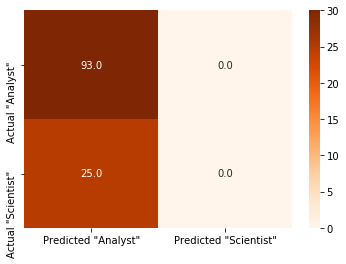

In [264]:
cm_bag = confusion_matrix(y_test, bag_pred)
sns.heatmap(cm_bag, annot=True, fmt = '.1f', cmap = 'Oranges', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted "Analyst"','Predicted "Scientist"'], 
            yticklabels = ['Actual "Analyst"', 'Actual "Scientist"'])

### 4. Random Forest

In [265]:
rf_params = {'n_estimators': [5,10,15,30,50],
            'max_features':[5,20,50,100,250,500],
            'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,20,25]}
rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_gs.fit(X_train, y_train)
rf = rf_gs.best_estimator_
print(rf_gs.best_params_)

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 250, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [266]:
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)

### Confusion matrix plot using Random Forest

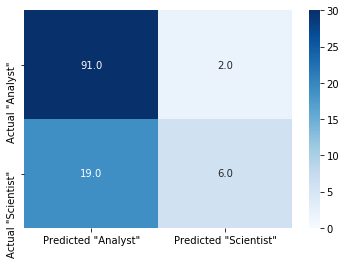

In [267]:
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt = '.1f', cmap = 'Blues', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted "Analyst"','Predicted "Scientist"'], 
            yticklabels = ['Actual "Analyst"', 'Actual "Scientist"'])

### 5. Logistic Regression

In [268]:
#WARNING: Slow!
logreg_params = {'penalty':['l2'],
                'C':np.logspace(-3,2,10),
                'solver':['newton-cg','sag']}

logreg_gs = GridSearchCV(LogisticRegression(), logreg_params, cv=5)
logreg_gs.fit(X_train, y_train)
logreg = logreg_gs.best_estimator_
print(logreg_gs.best_params_)

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACOND

{'C': 2.1544346900318843, 'penalty': 'l2', 'solver': 'newton-cg'}


D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\ANACONDA\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [269]:
logreg_pred = logreg.predict(X_test)
logreg_score = logreg.score(X_test, y_test)

### Confusion matrix plot using Logistic Reg 

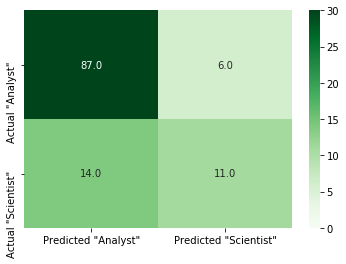

In [270]:
cm_lg = confusion_matrix(y_test, logreg_pred)
sns.heatmap(cm_lg, annot=True, fmt = '.1f', cmap = 'Greens', vmax = 30, vmin = 0, 
            xticklabels = ['Predicted "Analyst"','Predicted "Scientist"'], 
            yticklabels = ['Actual "Analyst"', 'Actual "Scientist"'])

### MODEL SUMMARY ::

In [271]:
models = ['KNN','DecisionTree','Bagging','RandomForest','LogisticRegression','Baseline']
accuracy = [knn_score, dtc_score, bag_score,rf_score,logreg_score, baseline]
model_summary = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
model_summary = class_summary.set_index('Model')

In [272]:
model_summary

,Accuracy
Model,
KNN,0.762712
DecisionTree,0.754237
Bagging,0.788136
RandomForest,0.822034
LogisticRegression,0.830508
Baseline,0.788136


### OBSV : 
1. Random Forrest and Log Reg returned have the highest accuracy and will evaluate further.
2. Both models did quite well in predicting the job category for "Data Analyst" classifying jobs based on key words, location and skills. It does better at predicting analyst than scientist roles in comparison, possibly more jobs are advertised for data analyst.
3. From the confusion matrix, Random Forrest did little better in prediting "Data Scientist" roles and Logistic Reg did well in predicting slighlty-well in predicting the "Data Analyst" roles but I will use Random Forrest for feature extraction and clustering.
4. Also, I have modified the X - predicted values columns three-four times and Random Forrest was always highest or one-of the highest. Hence, the rest of the modelling will be done using Random Forrest only.

### Features Extraction and their Importance using Random Forrest Model : 

In [273]:
X.shape

(355, 1028)

In [274]:
importance.shape

(1028,)

In [275]:
importance = rf.feature_importances_
importance_df = pd.DataFrame({'feature':X.columns, 'importance':importance}).sort_values('importance', ascending= False)
importance_df.head(20)

,feature,importance
1,Job_Title_data,0.171243
52,kw_abil,0.033323
175,kw_recommend,0.026391
79,kw_improv,0.025164
28,kw_develop,0.016064
58,kw_deliv,0.016035
959,kw_discov,0.014681
0,Salary_mean,0.014166
23,State_WA,0.014040
203,kw_degre,0.013998


#### OBSERVATION ::

Based on the above results, try to understand it :
1. Job title data has the highest importance, which I have tried removing from X columns while trying different ways but have kept it.
2. Other keywords from the importance suggest a lot above the Job categories for e.g. like "ability to improve" or "ability to recommend" or "ability to develop" etc says the key focus areas of a data science/analyst roles to work on data based projects and develop a model and imporve etc etc.
3. Also, keyword Sydney is mentioned as the highest number of jobs.
4. Sadly, I have tried many iterations but the some shows the key skills and in some iterations like this the skills are not printed.

In [276]:
### Clustering ::

Do 'data scientist', 'data analyst' and other data-related jobs form distinct clusters based on the keywords we've extracted?

If they do, our labels for data scientist/analyst/etc should match up relatively closely with the clusters found using 
unsupervised clustering algorithms such as K-means or DB-SCAN if we use the predictors we found to be important above.

### 1. Using K-means clustering

In [93]:
#Re-initialize predictors
X = jobs_sub[importance_df.feature.head(50)]
#Standardise
ss = StandardScaler()
X = ss.fit_transform(X)

D:\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ANACONDA\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### I will be trying different iterations with the k-means clustering to decide which number of clusters works best.

[0.05806138421134856, 0.052154175900294, 0.06745108818017422, 0.026570943140606516, 0.05784689890294101, 0.029070284333350477, 0.03242344618370186, 0.04181614179608581, 0.04494500365256683, 0.048959582348702034, 0.056988669232605156, 0.04566058885571587, 0.08732645018849196, 0.0787044121329188, 0.07457049877902511, 0.06984873781586941]


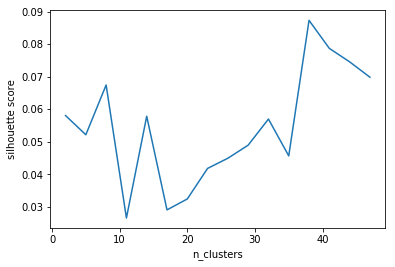

In [94]:
xvalues = []
scores = []
for i in range(2,50,3):
    km = KMeans(n_clusters = i, n_init = 20)
    model = km.fit(X)
    labels = model.labels_
    xvalues.append(i)
    scores.append(silhouette_score(X, model.labels_))
    
plt.plot(xvalues, scores)
plt.xlabel('n_clusters')
plt.ylabel('silhouette score')

print(scores)

### OBSV :
- Smaller cluster number will be better as donot want the clusters to sparsely placed.

In [280]:
#Run K-means clustering with different n_clusters

k2 = KMeans(n_clusters=2, n_init = 20)
k2model = k2.fit(X)
k3 = KMeans(n_clusters=3, n_init = 20)
k3model = k3.fit(X)
k4 = KMeans(n_clusters=4, n_init = 20)
k4model = k4.fit(X)

In [281]:
#Calculate labels, centroids and silhouette scores for each
k2_labels = k2model.labels_
k2_centroids = k2model.cluster_centers_
k2_score = silhouette_score(X, k2_labels)
k3_labels = k3model.labels_
k3_centroids = k3model.cluster_centers_
k3_score = silhouette_score(X, k3_labels)
k4_labels = k4model.labels_
k4_centroids = k4model.cluster_centers_
k4_score = silhouette_score(X, k4_labels)

#Print scores:
print('k2 score: ', k2_score)
print('k3_score: ', k3_score)
print('k4_score: ', k4_score)

k2 score:  0.9065196339122766
k3_score:  0.8587996465695715
k4_score:  0.8711229149780583


### OBSV :

- 2 clusters results in the highest score followed by 4 clusters and I can conclude the K-means works really well as our job category assignment are two.

### Homogeneity Metric measurement :

- Homogeneity metric of a cluster labeling given a ground truth.A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
- In other words, Homogeneity is a measure of whether each cluster contains only members from one class, and completeness is whether members of one class are concentrated into only one cluster.

In [287]:
homogeneity = homogeneity_score(y, k2_labels)
completeness = completeness_score(y, k2_labels)
vmeasure = v_measure_score(y, k2_labels)

print(homogeneity)
print(completeness)
print(vmeasure)

0.01112547910263022
0.04502589705285085
0.017842293850522994


The 2 cluster K-means model does not give clear image when we look at homogeneity and completeness. 

# 4.4.2 DBSCAN

In [288]:
#With a bit of trial and error, the best silhouette score I could obtain was using eps = 13 and min_samples = 5
db = DBSCAN(eps = 13, min_samples = 5)
model = db.fit(X)
db_labels = db.labels_

db_score = silhouette_score(X, db_labels)

print(db_score)

0.71360148320663


In [289]:
homogeneity = homogeneity_score(y, db_labels)
completeness = completeness_score(y, db_labels)
vmeasure = v_measure_score(y, db_labels)
print(homogeneity)
print(completeness)
print(vmeasure)

0.008415423423193968
0.0076502916148022465
0.008014637767096986


While the silhouette score for DBSCAN is reasonably good, the homogeneity score is quite poor, suggesting that our clusters 
contain members of several classes. This in turn results in a lower v measure score, which is the harmonic mean between the 
homogeneity and completeness scores. Since the K-means model performed better I will visualise the clusters we found using the 
2-cluster K-means model above.

### Cluster visualisation and plotting :

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Predicted classification')

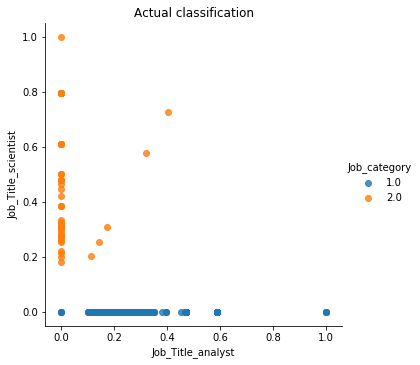

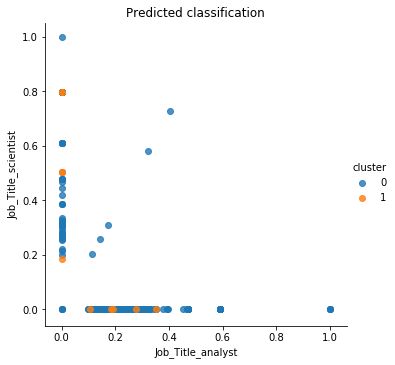

In [290]:
jobs_sub['cluster'] = k2_labels
sns.lmplot(x='Job_Title_analyst',y='Job_Title_scientist',data=jobs_sub,hue='Job_category',fit_reg=False)
plt.title('Actual classification')

sns.lmplot(x='Job_Title_analyst',y='Job_Title_scientist',data=jobs_sub,hue='cluster',fit_reg=False)
plt.title('Predicted classification')

We have at least one group that clusters quite homogenously to the 'scientist' section of the plot, while the other cluster are scattered across both groups.

Text(0.5, 1.0, 'Predicted classification')

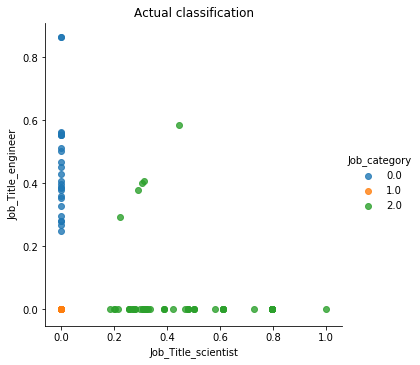

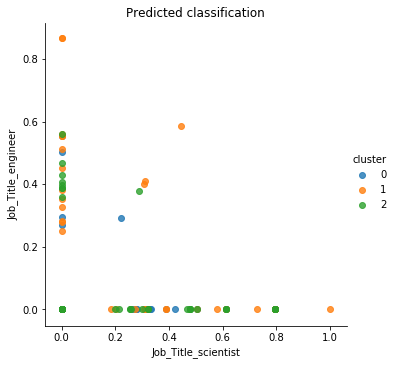

In [104]:
sns.lmplot(x='Job_Title_scientist',y='Job_Title_engineer',data=jobs_sub,hue='Job_category',fit_reg=False)
plt.title('Actual classification')

sns.lmplot(x='Job_Title_scientist',y='Job_Title_engineer',data=jobs_sub,hue='cluster',fit_reg=False)
plt.title('Predicted classification')

Again, the green cluster groups fairly homogenously with the 'scientist' roles, suggesting that this cluster probably consists 
of 'data scientist' jobs. We at least have one cluster that consists entirely of jobs with 'scientist' in the title, although 
this cluster does not include all such jobs.

In [293]:
jobs.Job_Title.value_counts()

Data Scientist                                                     26
Data Analyst                                                       13
Business Analyst                                                   12
Senior Data Scientist                                               6
Pricing Analyst                                                     4
Commercial Analyst                                                  4
Senior Business Analyst                                             4
Analyst                                                             4
Junior Data Scientist                                               4
Senior Analyst                                                      3
Lead Data Scientist                                                 3
Financial Analyst                                                   3
Business Process Analyst                                            2
Account Executive                                                   2
Business Development

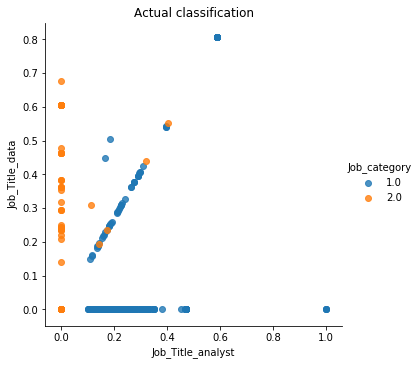

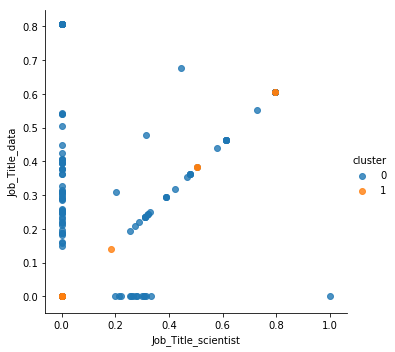

In [303]:
sns.lmplot(x='Job_Title_analyst',y='Job_Title_data',data=jobs_sub,hue='Job_category',fit_reg=False)
plt.title('Actual classification')

sns.lmplot(x='Job_Title_scientist',y='Job_Title_data',data=jobs_sub,hue='cluster',fit_reg=False)
#lt.title('Predicted classification')

### OBSV :The clusters are not homogenous when it comes to data analyst vs data scientist jobs. Even with our actual labels though, we can see that there is less clear seaparation between these categories.